## Project 4 - Insurance Claims Severity 

## Objective
* In this project, you are asked to build a regression model to predict how sever is a claim given some information about a particular claim. You would want to take advantage of the knowledge you have learned about regression problems and apply it in a practical project like this.
* Please take a good documentation explain the steps of your data analysis process and also some comments for your code as well so that anyone who read your code could get a good understanding of what is going on.
* Explain your results in the context of the claim severity, and give some insights or conclusion about your whole analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
%matplotlib inline

#### Read data

In [2]:
test = pd.read_csv("test.csv")

In [4]:
test.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,cat41,cat42,cat43,cat44,cat45,cat46,cat47,cat48,cat49,cat50,cat51,cat52,cat53,cat54,cat55,cat56,cat57,cat58,cat59,cat60,cat61,cat62,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72,cat73,cat74,cat75,cat76,cat77,cat78,cat79,cat80,cat81,cat82,cat83,cat84,cat85,cat86,cat87,cat88,cat89,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,4,A,B,A,A,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,D,D,B,B,C,B,D,B,A,A,A,A,A,D,C,C,E,C,D,T,H,G,A,A,G,E,I,L,K,BI,BC,A,J,AX,A,Q,HG,0.321594,0.299102,0.246911,0.402922,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
1,6,A,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,B,A,D,B,B,D,D,B,B,C,B,B,B,A,A,A,A,A,D,D,D,E,A,A,P,B,D,A,A,G,G,G,F,B,BI,CO,E,G,X,A,L,HK,0.634734,0.620805,0.654310,0.946616,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
2,9,A,B,A,B,B,A,B,A,B,B,A,B,B,B,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,B,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,D,B,B,B,B,B,D,C,B,B,B,A,B,A,A,A,D,D,C,E,E,A,D,G,Q,A,D,D,E,J,G,A,BI,CS,C,U,AE,A,K,CK,0.290813,0.737068,0.711159,0.412789,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232
3,12,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,B,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,D,B,D,B,D,B,B,A,B,D,D,A,A,A,G,H,D,D,C,E,E,D,T,G,A,A,D,E,E,I,K,K,BI,CR,A,AY,AJ,A,P,DJ,0.268622,0.681761,0.592681,0.354893,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955
4,15,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,D,D,B,B,C,B,B,B,A,A,A,A,A,D,B,D,E,A,A,P,A,A,A,A,F,E,G,E,B,AB,EG,A,E,I,C,J,HA,0.553846,0.299102,0.263570,0.696873,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823


In [3]:
train = pd.read_csv("train.csv")

In [6]:
train.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,cat41,cat42,cat43,cat44,cat45,cat46,cat47,cat48,cat49,cat50,cat51,cat52,cat53,cat54,cat55,cat56,cat57,cat58,cat59,cat60,cat61,cat62,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72,cat73,cat74,cat75,cat76,cat77,cat78,cat79,cat80,cat81,cat82,cat83,cat84,cat85,cat86,cat87,cat88,cat89,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,D,B,B,D,D,B,D,C,B,D,B,A,A,A,A,A,D,B,C,E,A,C,T,B,G,A,A,I,E,G,J,G,BU,BC,C,AS,S,A,O,LB,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,D,D,A,B,C,B,D,B,A,A,A,A,A,D,D,C,E,E,D,T,L,F,A,A,E,E,I,K,K,BI,CQ,A,AV,BM,A,O,DP,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,B,B,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,B,D,B,D,C,B,B,B,A,A,A,A,A,D,D,C,E,E,A,D,L,O,A,B,E,F,H,F,A,AB,DK,A,C,AF,A,I,GK,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,D,B,B,D,D,D,B,C,B,D,B,A,A,A,A,A,D,D,C,E,E,D,T,I,D,A,A,E,E,I,K,K,BI,CS,C,N,AE,A,O,DJ,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,B,A,B,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,D,B,D,B,D,B,B,C,B,B,C,A,A,A,B,H,D,B,D,E,E,A,P,F,J,A,A,D,E,K,G,B,H,C,C,Y,BM,A,K,CK,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


#### Look at Nan and Null

In [7]:
check = pd.DataFrame(test.isna().sum())
check[0].value_counts()

0    131
Name: 0, dtype: int64

In [8]:
check = pd.DataFrame(train.isna().sum())
check[0].value_counts()

0    132
Name: 0, dtype: int64

#### Check Dtypes

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125546 entries, 0 to 125545
Columns: 131 entries, id to cont14
dtypes: float64(14), int64(1), object(116)
memory usage: 125.5+ MB


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 189.7+ MB


#### Look at categorical variables 

In [4]:
numeric_col = train.select_dtypes(['float64', 'int64']).columns
categorical_col = train.select_dtypes(['object']).columns

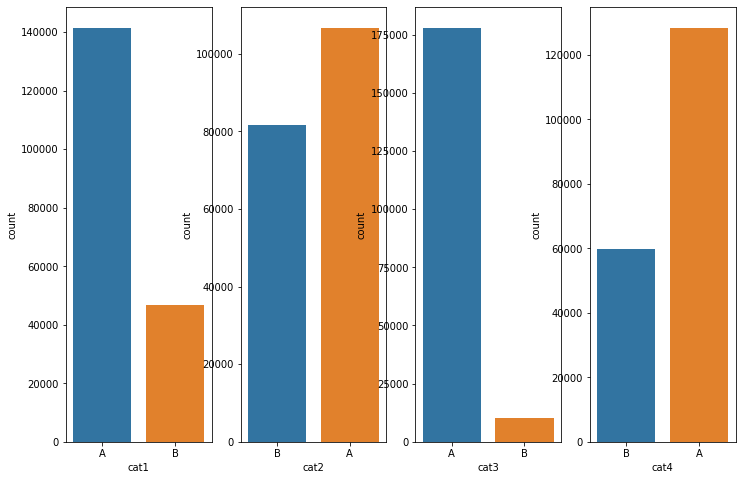

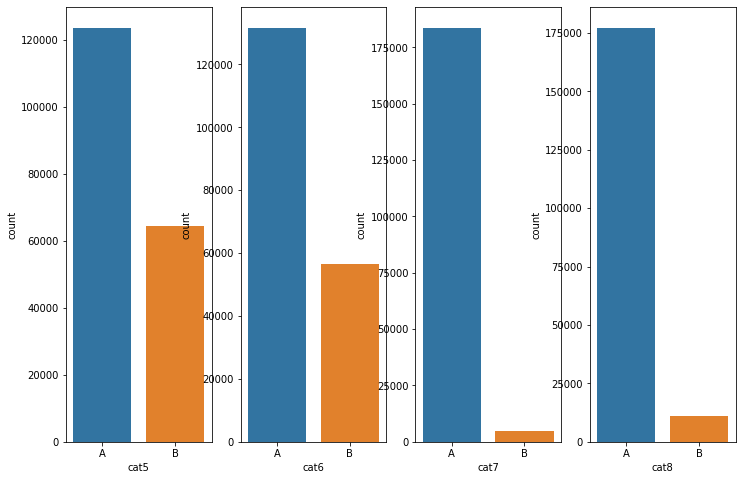

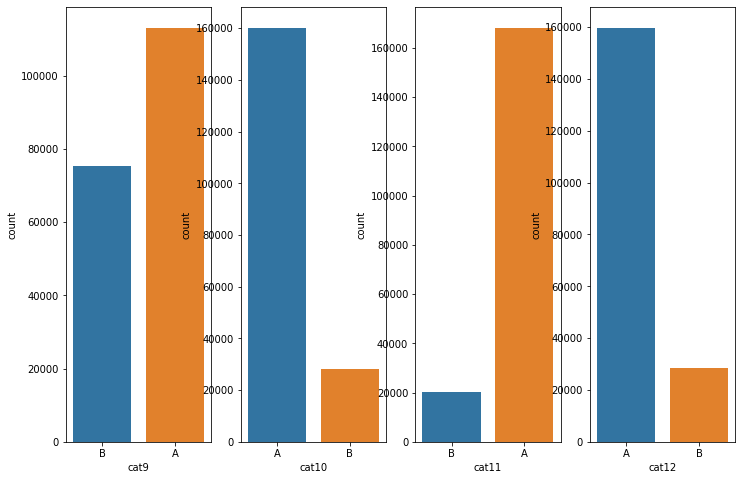

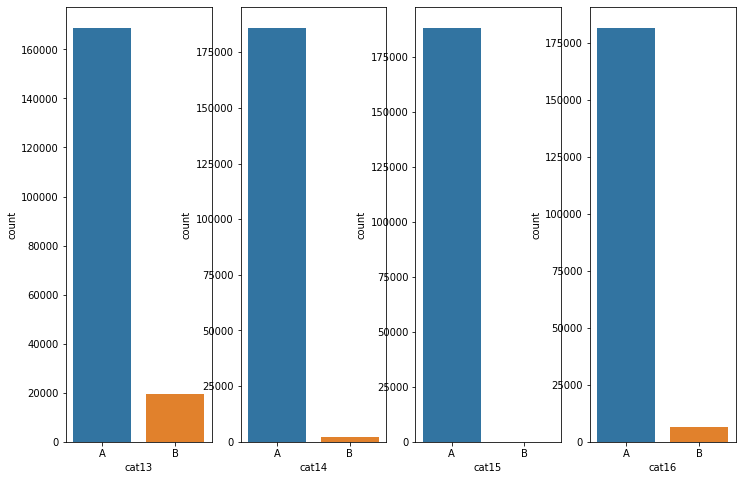

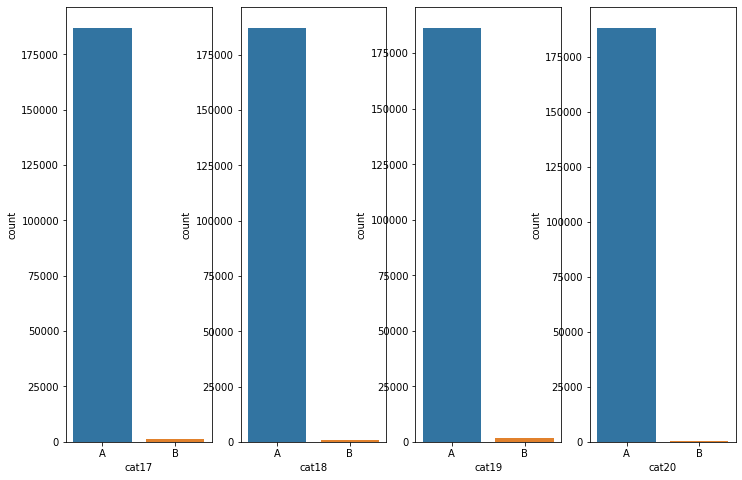

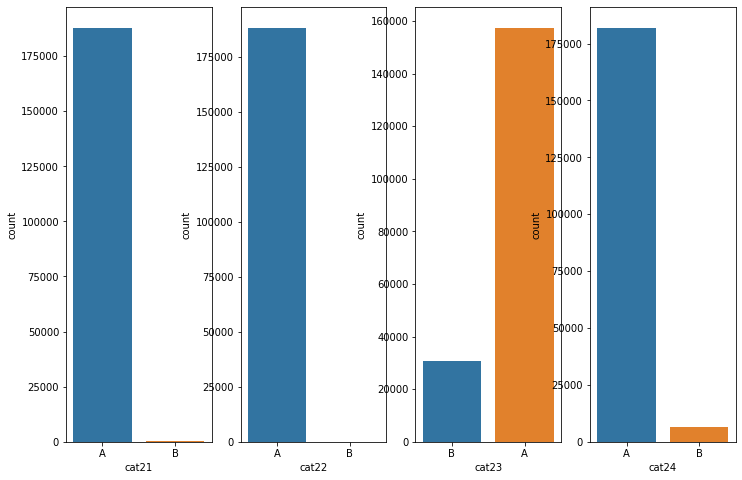

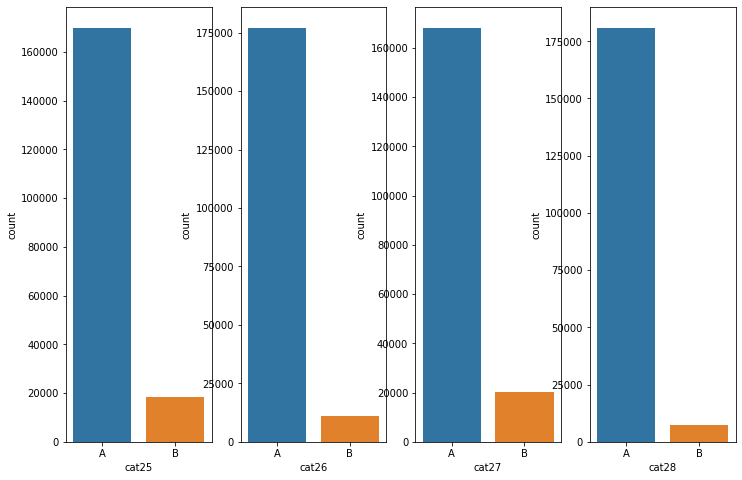

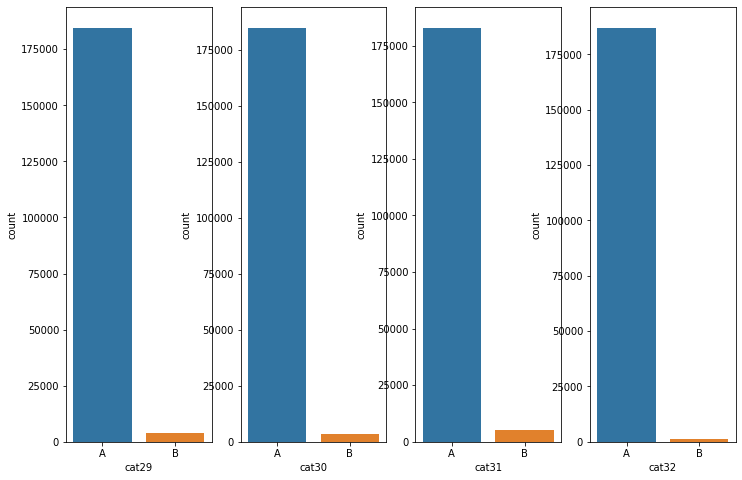

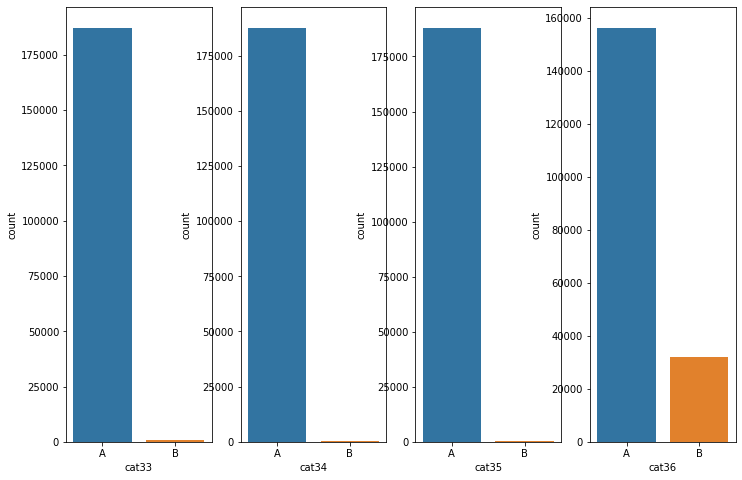

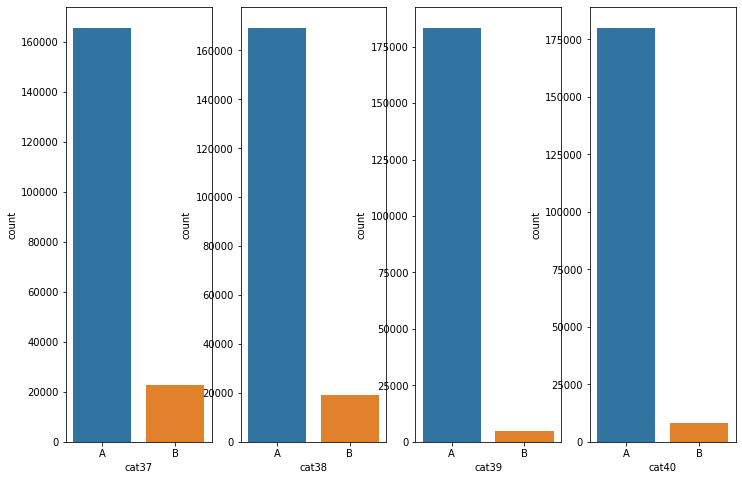

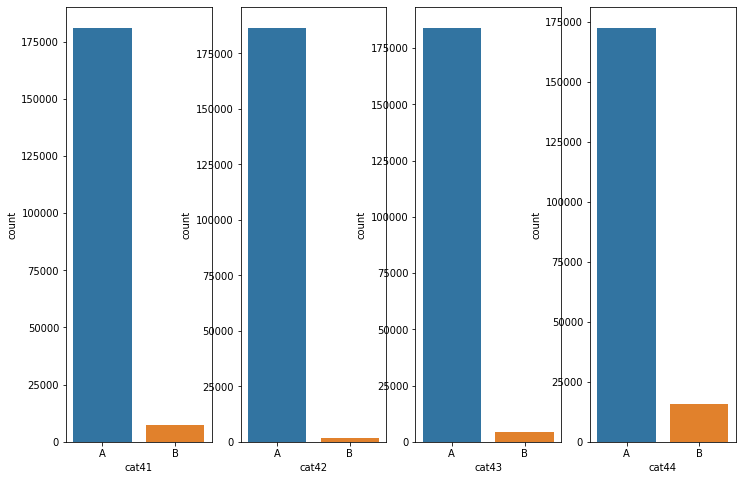

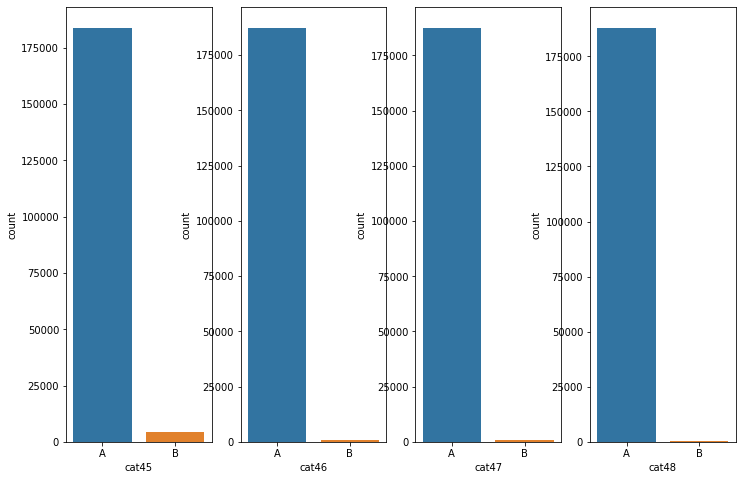

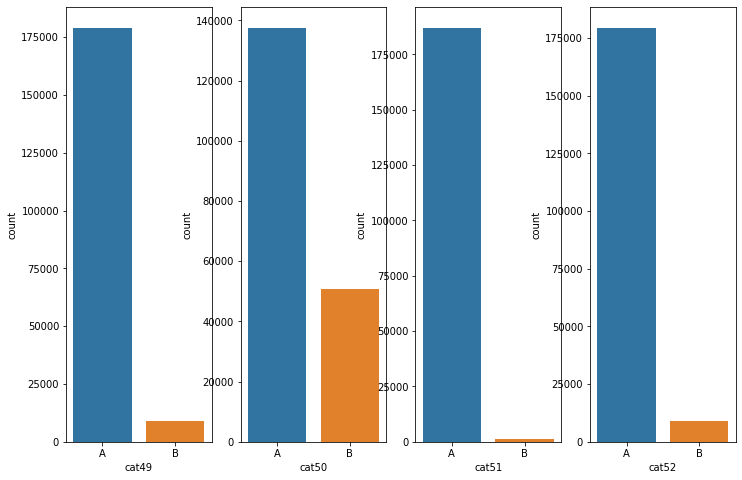

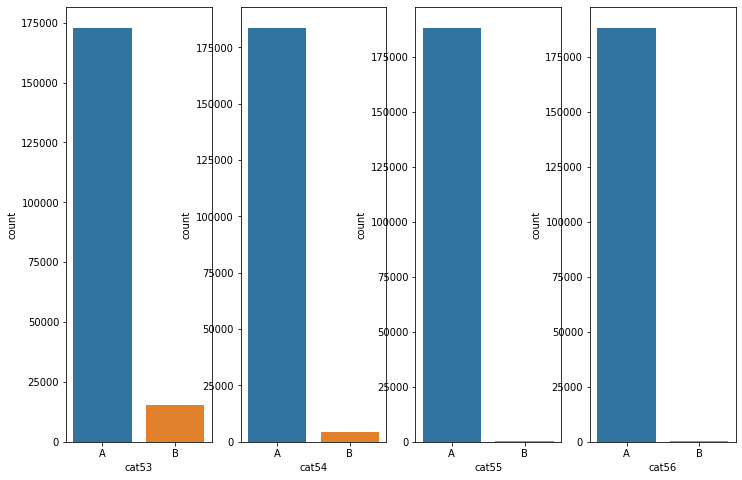

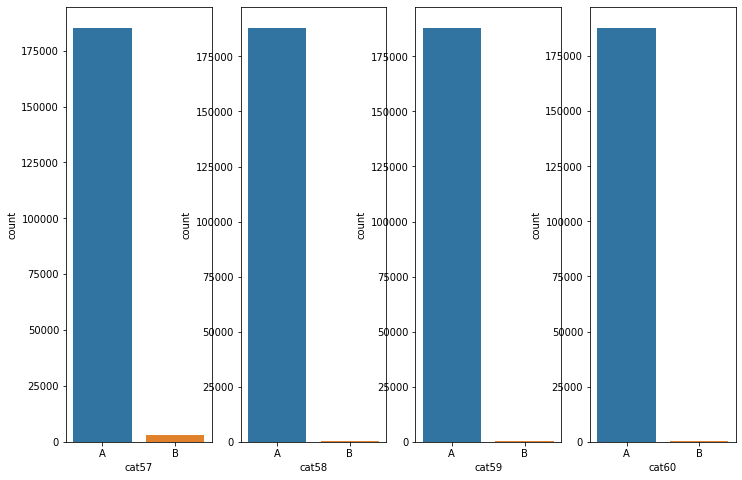

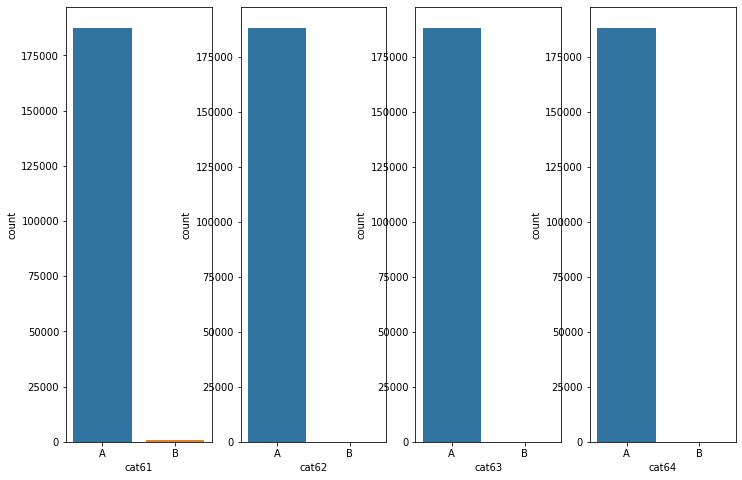

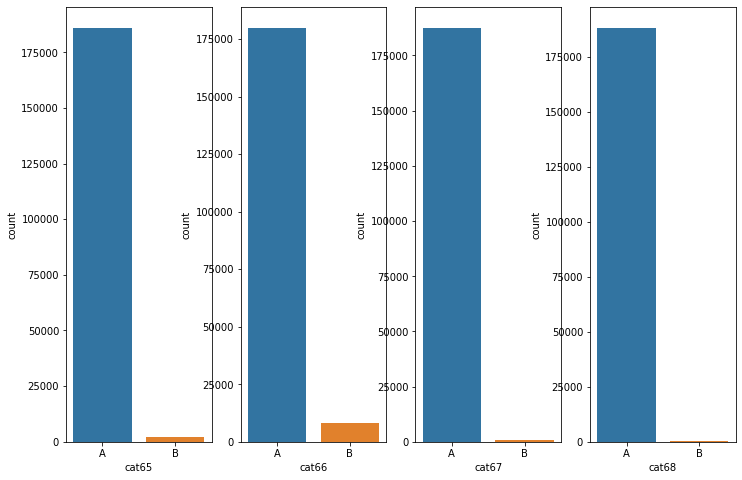

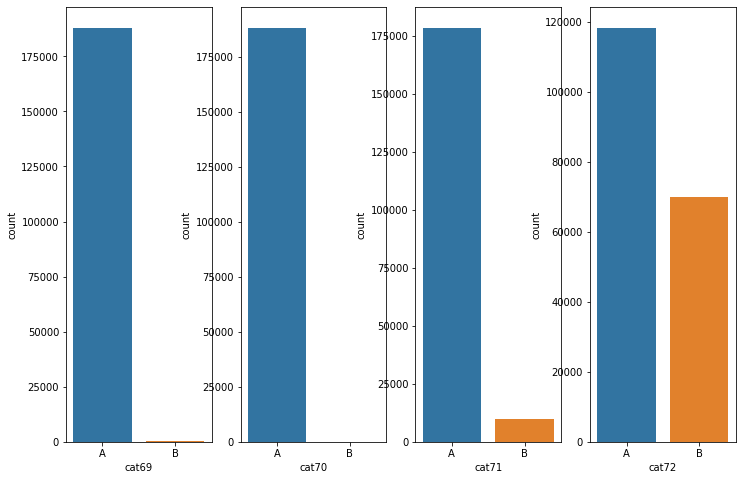

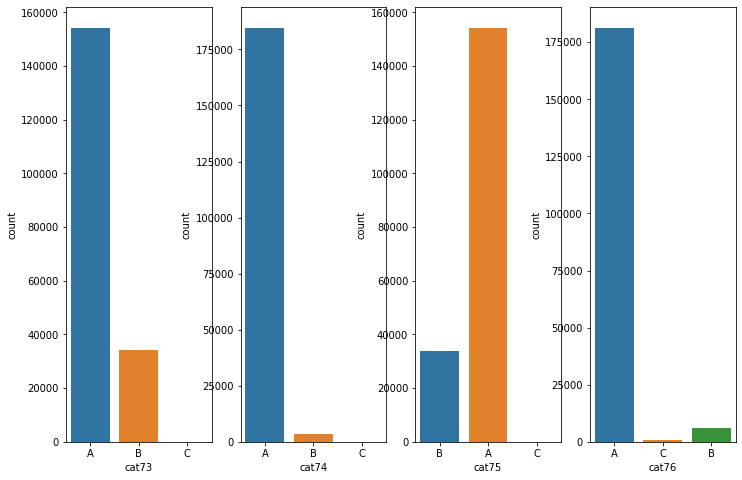

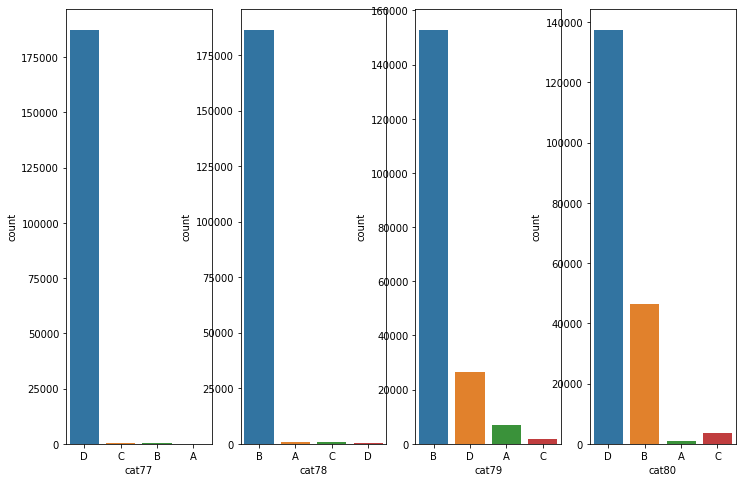

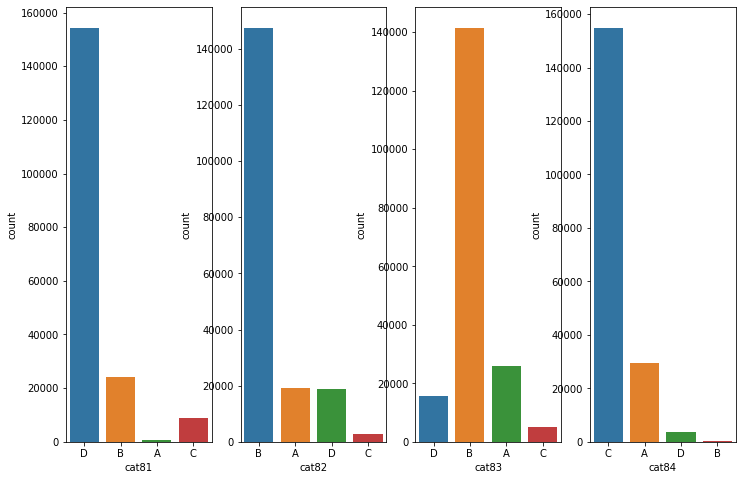

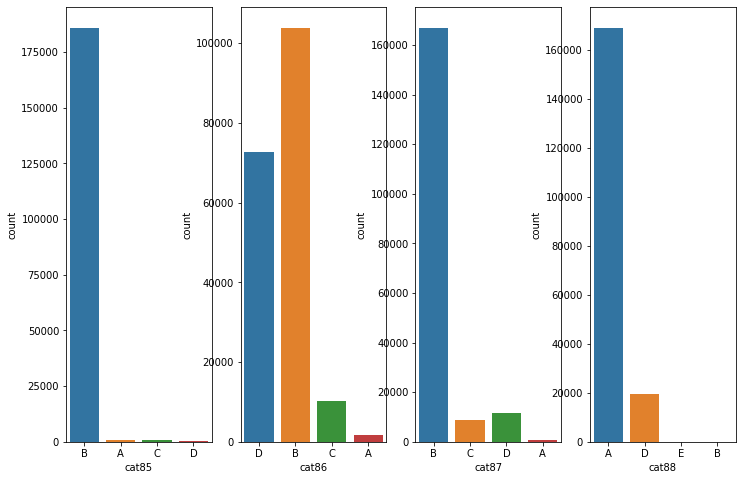

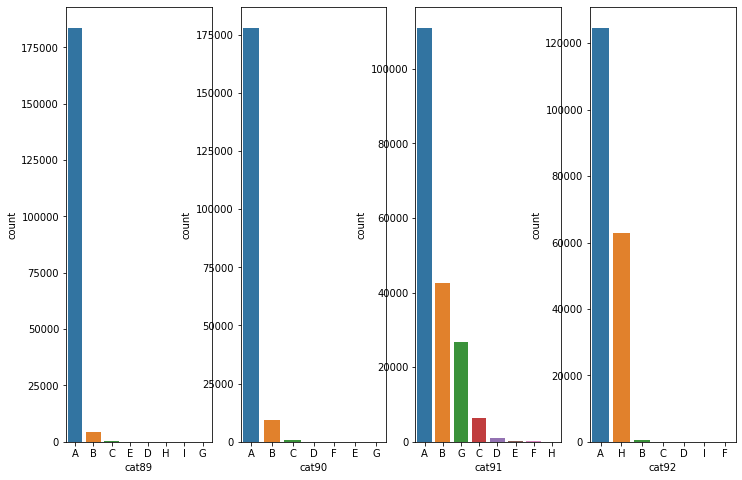

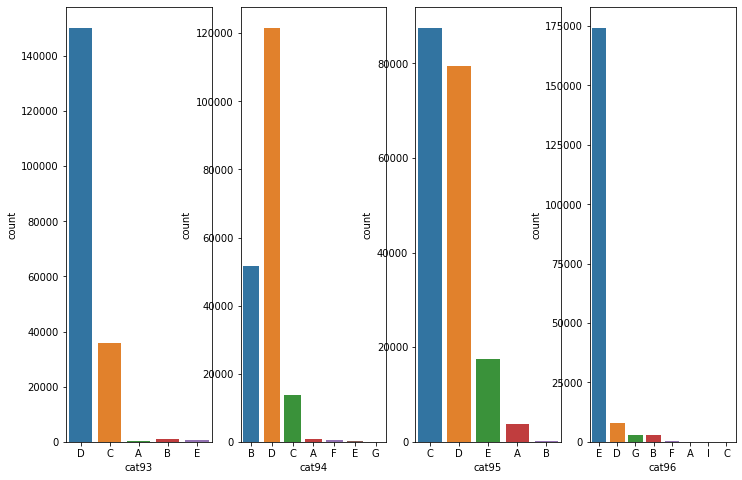

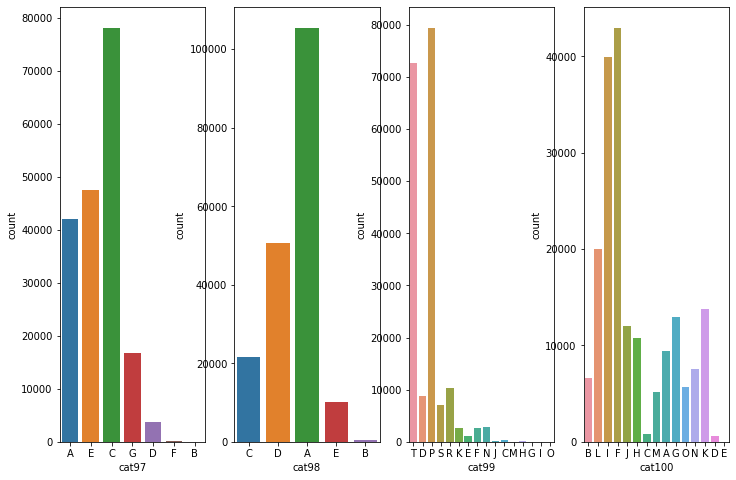

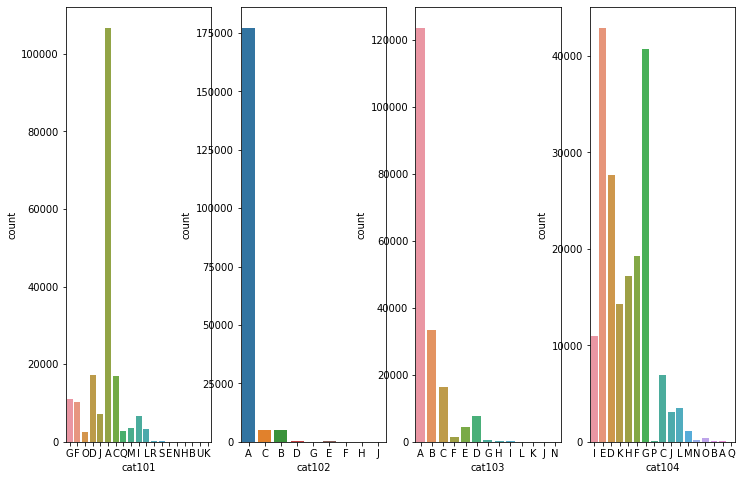

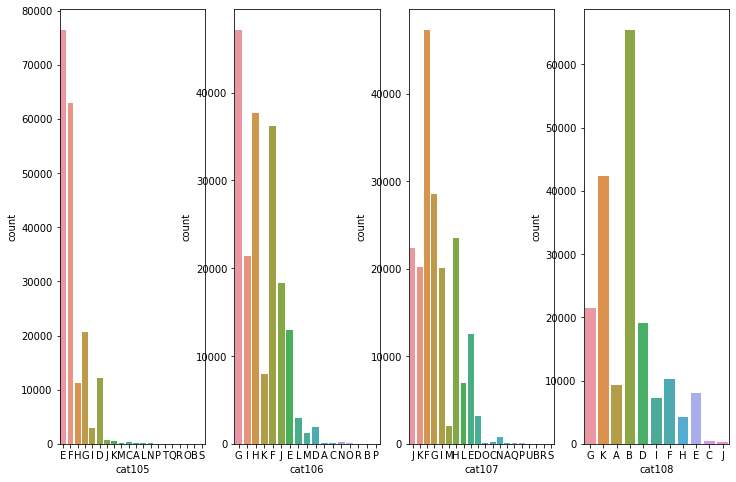

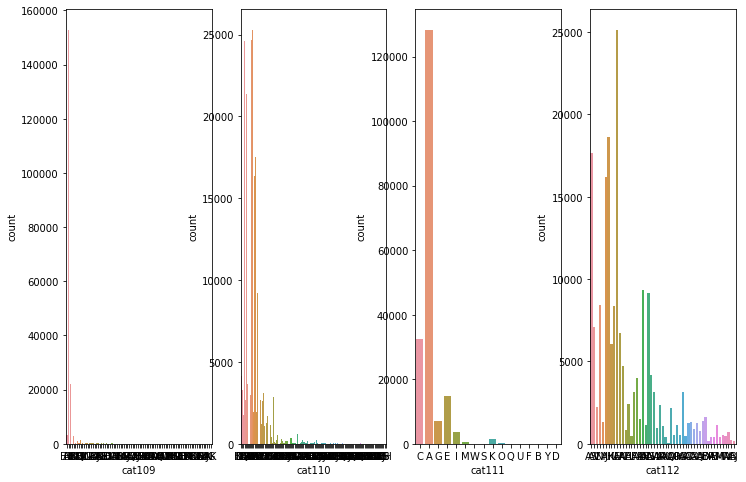

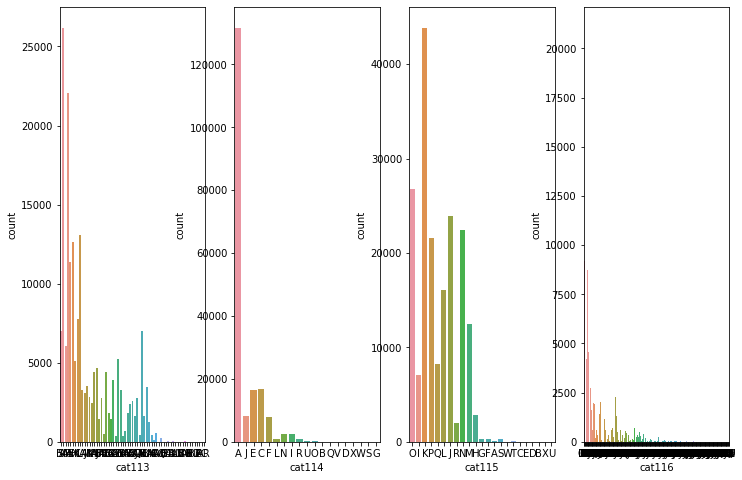

In [6]:
n_cols = 4
n_rows = 29
for i in range(n_rows):
    fg, ax = plt.subplots(nrows=1, ncols=n_cols, figsize=(12, 8))
    for j in range(n_cols):
        sns.countplot(x=categorical_col[i*n_cols+j], data=train, ax=ax[j])

In [30]:
remove_col = []

In [31]:
for i in train.select_dtypes(['object']).columns:
    test = train[i].value_counts()/(188318)
    if (test > 0.98).any(): 
        remove_col.append(i)
        

In [34]:
len(remove_col)

38

In [51]:
train = train.drop(remove_col, axis=1)

#### Look at continous variables 

In [6]:
len(numeric_col)
numeric_col = numeric_col.drop(['loss', 'id'])

16

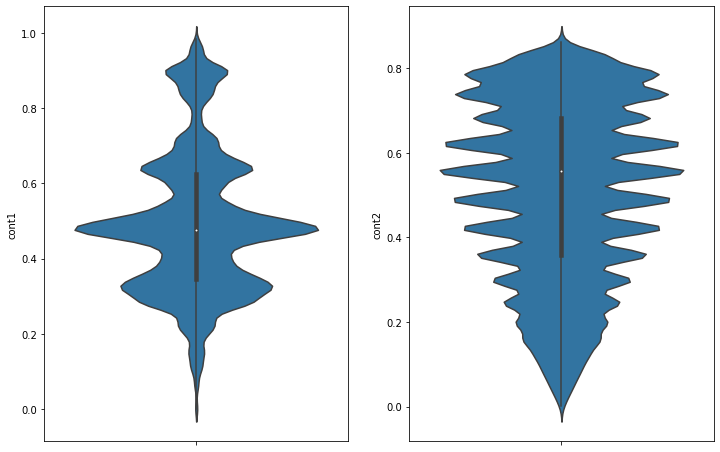

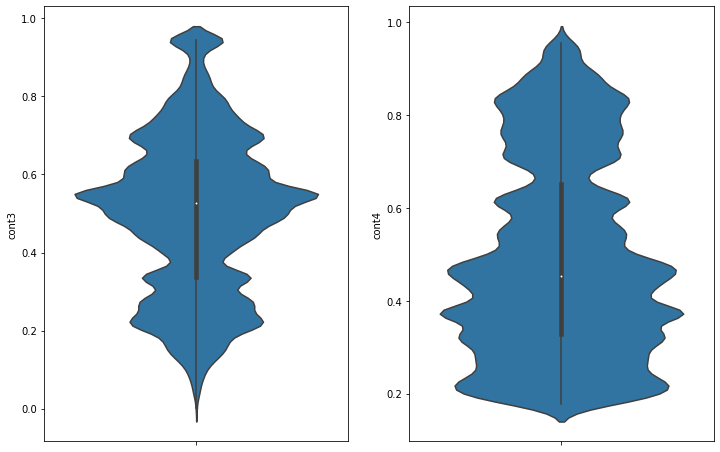

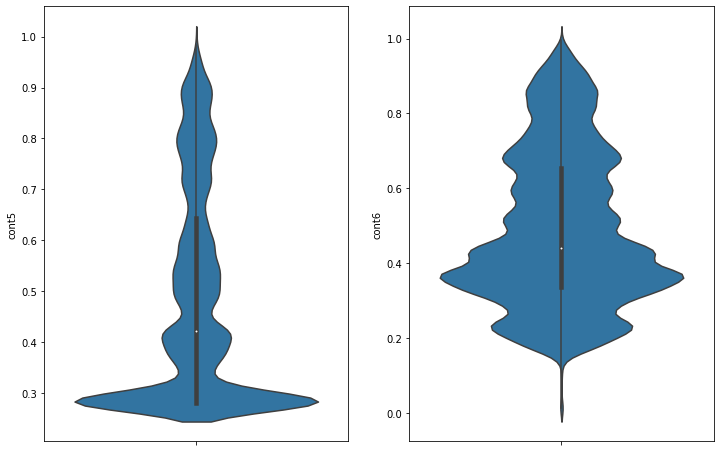

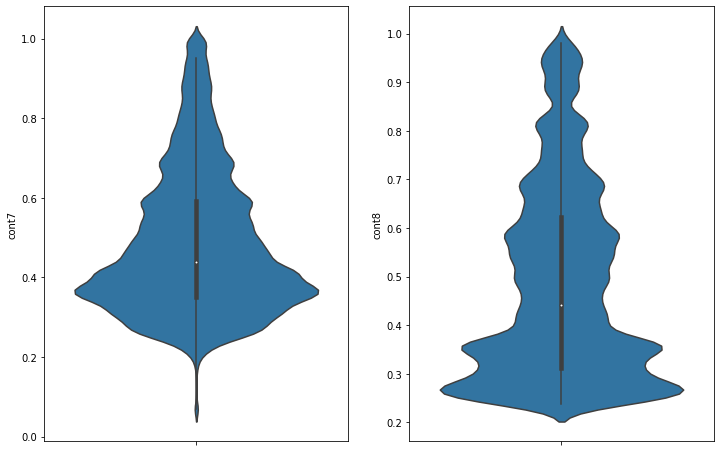

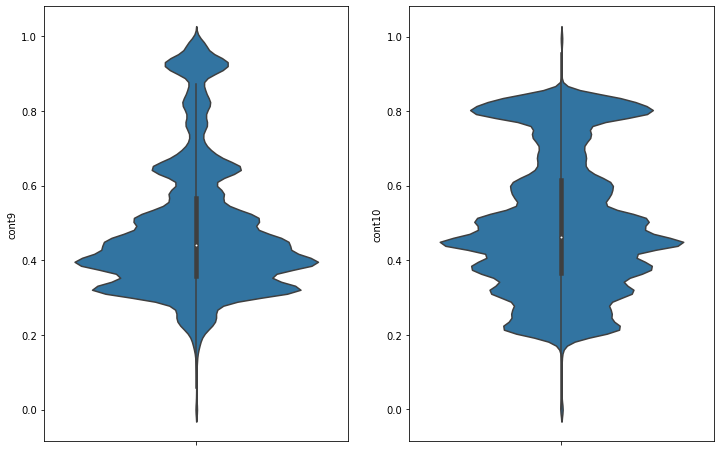

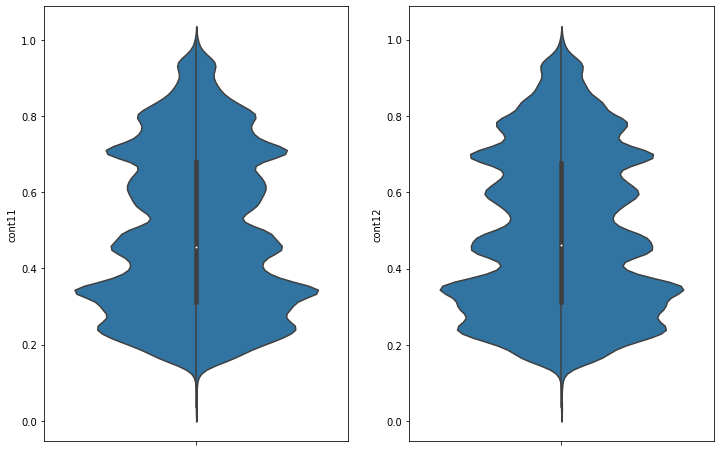

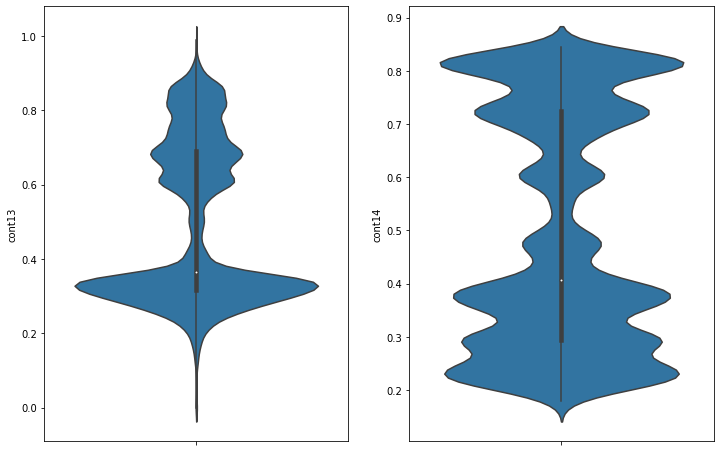

In [9]:
n_cols = 2
n_rows = 7
for i in range(n_rows):
    fg, ax = plt.subplots(nrows=1, ncols=n_cols, figsize=(12, 8))
    for j in range(n_cols):
        sns.violinplot(y=numeric_col[i*n_cols+j], data=train, ax=ax[j])

In [42]:
len(numeric_col)

14

#### Look at label and transform

<AxesSubplot:ylabel='loss'>

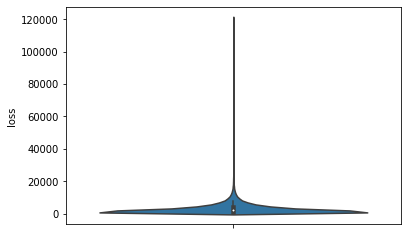

In [46]:
sns.violinplot(data=train, y=train['loss'])

<AxesSubplot:ylabel='loss'>

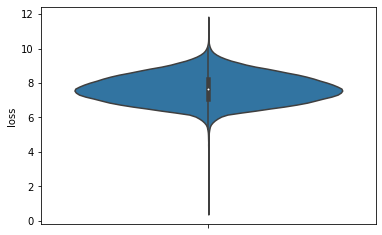

In [47]:
train['loss'] = np.log1p(train["loss"])
sns.violinplot(data=train, y=train['loss'])

#### Check Correlation 

In [53]:
corr = train.select_dtypes(['float64', 'int64']).drop('id', axis = 1).corr().unstack().abs().reset_index()
corr[(corr[0] > 0.85) & (corr[0] != 1)].sort_values(0, ascending=False)


,level_0,level_1,0
161,cont11,cont12,0.994384
175,cont12,cont11,0.994384
8,cont1,cont9,0.929912
120,cont9,cont1,0.929912
84,cont6,cont10,0.883351
140,cont10,cont6,0.883351


In [55]:
corr_drop = ['cont11', 'cont1', 'cont6']

#### Check Binary variables 

In [63]:
train_cor = train.drop(corr_drop, axis=1)

In [61]:
train_cor.shape

(188318, 91)

In [57]:
# Count unique value in categorical variables 
count = [len(train_cor.select_dtypes('object')[i].unique()) for i in train_cor.select_dtypes('object').columns]

In [58]:
cat_var = pd.DataFrame({"col_name": train_cor.select_dtypes('object').columns, "cnt_num": count})

In [59]:
cat_var

,col_name,cnt_num
0,cat1,2
1,cat2,2
2,cat3,2
3,cat4,2
4,cat5,2
5,cat6,2
6,cat7,2
7,cat8,2
8,cat9,2
9,cat10,2


In [64]:
non_binary = cat_var[cat_var['cnt_num']>2]['col_name']
binary = cat_var[cat_var['cnt_num']==2]['col_name']

#### Replace Categorical Variable 

In [65]:
binary_dummy = pd.get_dummies(data=train_cor[binary], drop_first=True)

In [66]:
nonbinary_dummy = pd.get_dummies(data=train_cor[non_binary], drop_first=True)

In [67]:
output = pd.concat([train_cor.select_dtypes(['float64', 'int64']), binary_dummy, nonbinary_dummy], axis=1)

In [73]:
# output.info()

#### Skewness of each numeric features

In [62]:
from scipy.stats import skew, boxcox
skewed_cols = train[numeric_col].apply(lambda x: skew(x.dropna()))
print(skewed_cols.sort_values())

cont2    -0.310939
cont3    -0.010002
cont14    0.248672
cont11    0.280819
cont12    0.291990
cont10    0.354998
cont13    0.380739
cont4     0.416093
cont6     0.461211
cont1     0.516420
cont8     0.676629
cont5     0.681617
cont7     0.826046
cont9     1.072420
dtype: float64


In [ ]:
# threshold = 0.15
# skewed_cols = skewed_cols[abs(skewed_cols) > threshold].index.values
# for skewed_col in skewed_cols:
#     train[skewed_col], lam = boxcox(train[skewed_col] + 1)
# skewed_cols = train[numeric_col].apply(lambda x: skew(x.dropna()))
# print(skewed_cols.sort_values())

#### Baseline model

In [68]:
from sklearn.model_selection import train_test_split
X = output.drop(['id', 'loss'], axis = 1)
y = output['loss']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [69]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [80]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

Mean squared error: 2268107643206288277504.00


<AxesSubplot:>

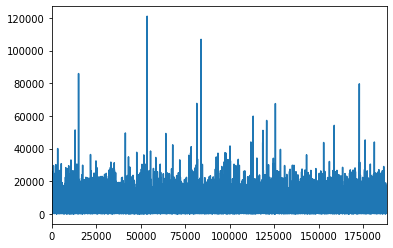

In [82]:
y.plot()

In [83]:
train_cor.select_dtypes(['float64', 'int64']).describe()

,id,cont2,cont3,cont4,cont5,cont7,cont8,cont9,cont10,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,294135.982561,0.507188,0.498918,0.491812,0.487428,0.484970,0.486437,0.485506,0.498066,0.493150,0.493138,0.495717,3037.337686
std,169336.084867,0.207202,0.202105,0.211292,0.209027,0.178450,0.199370,0.181660,0.185877,0.209427,0.212777,0.222488,2904.086186
min,1.000000,0.001149,0.002634,0.176921,0.281143,0.069503,0.236880,0.000080,0.000000,0.036232,0.000228,0.179722,0.670000
25%,147748.250000,0.358319,0.336963,0.327354,0.281143,0.350175,0.312800,0.358970,0.364580,0.311661,0.315758,0.294610,1204.460000
50%,294539.500000,0.555782,0.527991,0.452887,0.422268,0.438285,0.441060,0.441450,0.461190,0.462286,0.363547,0.407403,2115.570000
75%,440680.500000,0.681761,0.634224,0.652072,0.643315,0.591045,0.623580,0.566820,0.614590,0.675759,0.689974,0.724623,3864.045000
max,587633.000000,0.862654,0.944251,0.954297,0.983674,1.000000,0.980200,0.995400,0.994980,0.998484,0.988494,0.844848,121012.250000


Summary: Baseline linear regression is pretty bad on the dataset. We probably should rescale it or use tree based model. 

#### Try DecisionTreeRegressor

In [71]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [74]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = tree_reg.predict(X_test)
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

Mean squared error: 0.62


In [86]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, X_train, y_train,
scoring="neg_mean_squared_error", cv=10)

In [89]:
rmse_scores = np.sqrt(-scores)
rmse_scores

array([2725.57966525, 2939.02090267, 2751.16073117, 2854.00110028,
       2863.2792866 , 2717.78396395, 2714.84664392, 2702.57890948,
       2734.41274085, 2742.3418601 ])

In [90]:
importance = tree_reg.feature_importances_

In [93]:
feature_importance = pd.DataFrame({'col_names': X_train.columns, 'importance': importance})

In [96]:
feature_importance.sort_values('importance', ascending=False)

,col_names,importance
100,cat80_B,0.227568
4,cont7,0.085908
67,cat57_B,0.051736
0,cont2,0.043102
10,cont14,0.034974
99,cat79_D,0.033328
22,cat12_B,0.031511
8,cont12,0.022556
105,cat81_D,0.021189
5,cont8,0.015384


Conclusion: Tree based model does a better job. 
    cat80_B seems to be important to explain the model, but none of the variables are very importnat. 